# Workshop 8: Polynomial Regression

## Importing Libraries

In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


## Synthetic Data

### Generating Data

In [6]:
np.random.seed(42)  # For consistency and reproducibility
                    # to ensure you get same random numbers

n_samples=100                  # number of samples
X=np.linspace(0,10,n_samples)  # creates equally spaced samples 
                               # from 0 to 10

# creates a quadratic dataset with some random noise
y= 3*X**2 +2*X + 5 + np.random.normal(scale=10,size=n_samples)

# adding noise adds some realism allowing to test data for
# real world problems 

### Defining the model

**Quadratic Model**

In [9]:
degree = 2

with pm.Model() as model:

    coeffs= pm.Normal('coeffs', mu=0, sd=10, shape=degree+1)

    y_pred=pm.math.dot(coeffs,np.vander(X,degree+1, increasing=True).T)

    likelihood= pm.Normal('y_obs', mu= y_pred, sd=10, observed=y)

    trace= pm.sample(2000, tune=1000)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coeffs]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The acceptance probability does not match the target. It is 0.8828601511458335, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


### Visualising the results

C:\Windows\Temp\ipykernel_1536\1038424217.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = n

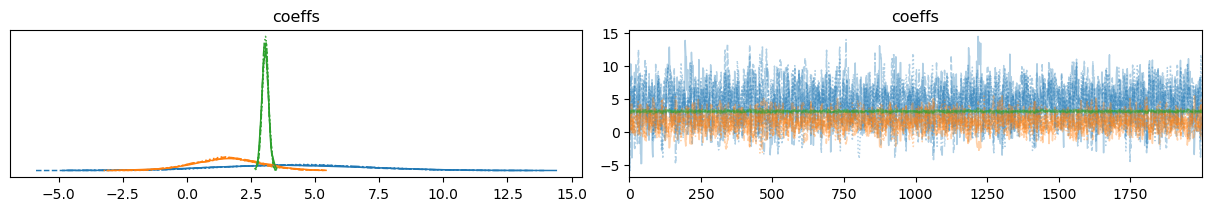

In [10]:
pm.traceplot(trace)
plt.show()


**Plotting the fitted polynomial curve**

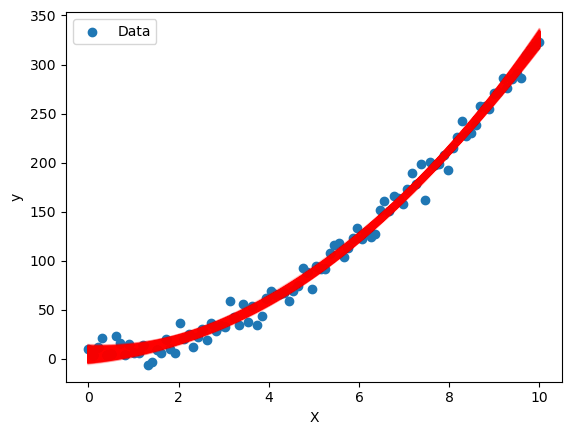

In [13]:
x_vals= np.linspace(0,10,100)
y_fitted = np.dot(np.vander(x_vals,degree+1,increasing=True),trace['coeffs'].T)

plt.scatter(X,y,label='Data')
plt.plot(x_vals,y_fitted,color='r',alpha=0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
